In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_features.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_features.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_labels.csv')

In [3]:
features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
labels = pd.concat([mon_labels, unmon_labels], axis=0, ignore_index=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [5]:
from sklearn.naive_bayes import GaussianNB

nb_multi = GaussianNB()
nb_multi.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = nb_multi.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.08051724137931035
Confusion Matrix
 [[48  0  0 ...  0  6 30]
 [ 2  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  3]]


### Evaluation Metrics

In [8]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [9]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.21245380919891352
Recall: 0.08051724137931035


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.56      0.02      0.05      1932
           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        38
           6       0.11      0.69      0.19        52
           7       0.12      0.02      0.04        41
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        41
          11       0.06      0.14      0.08        35
          12       0.55      0.13      0.21        47
          13       0.00      0.00      0.00        36
          14       0.00      0.00      0.00        47
          15       0.08      0.07      0.07        44
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Precision')

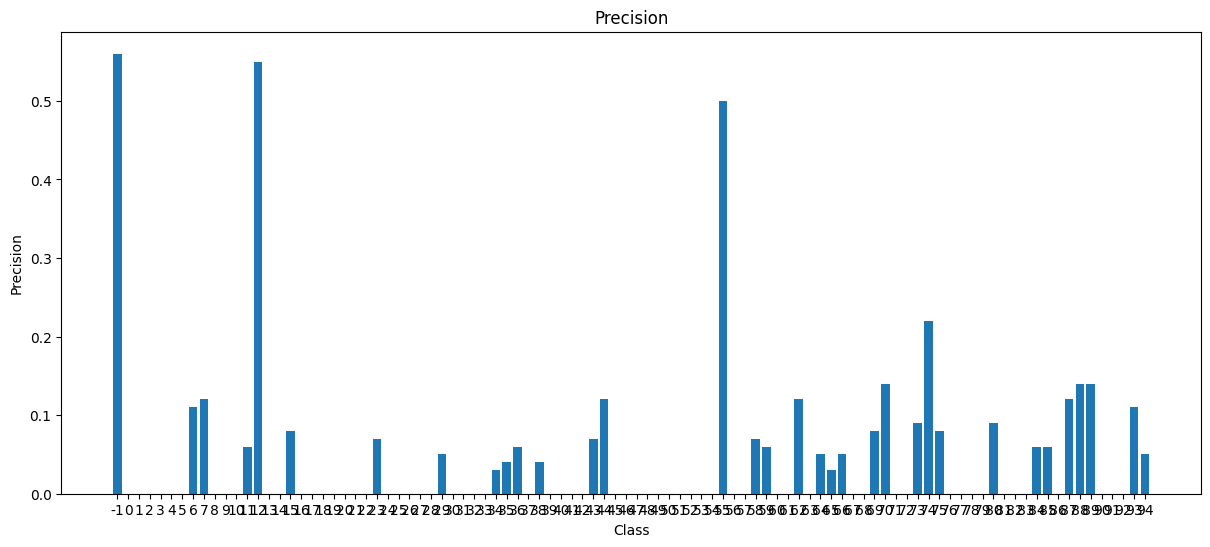

In [13]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    class_name = row[0]
    precision = float(row[1])
    recall = float(row[2])
    f1_score = float(row[3])
    data.append([class_name, precision, recall, f1_score])


df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(50, 6))

# Precision
plt.subplot(1, 3, 1)
plt.bar(df['Class'], df['Precision'])
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

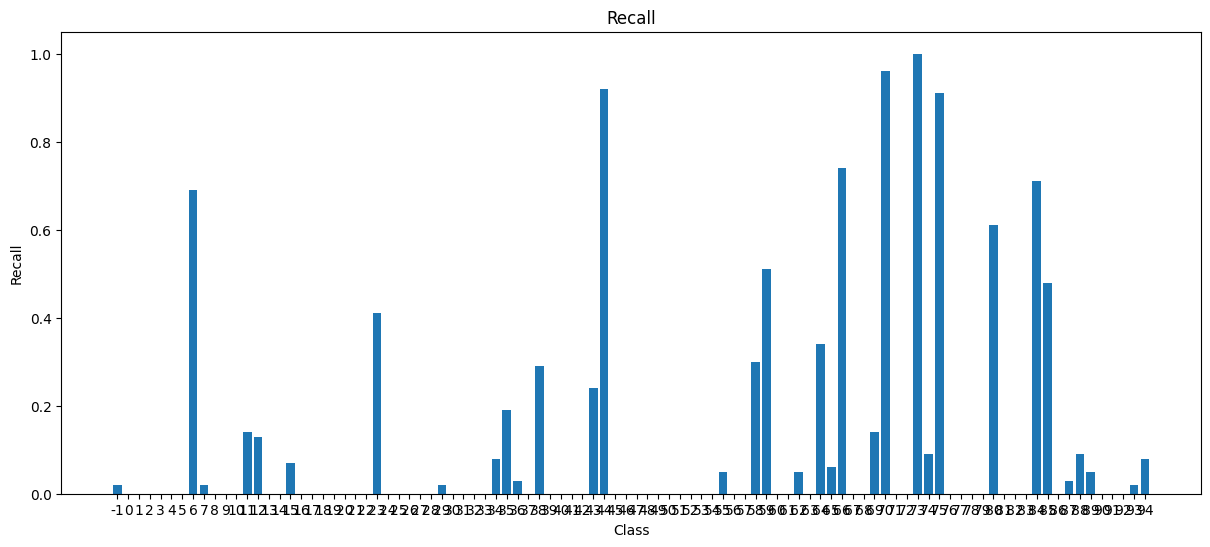

In [14]:
plt.figure(figsize=(50, 6))

# Recall
plt.subplot(1, 3, 2)
plt.bar(df['Class'], df['Recall'])
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Recall')

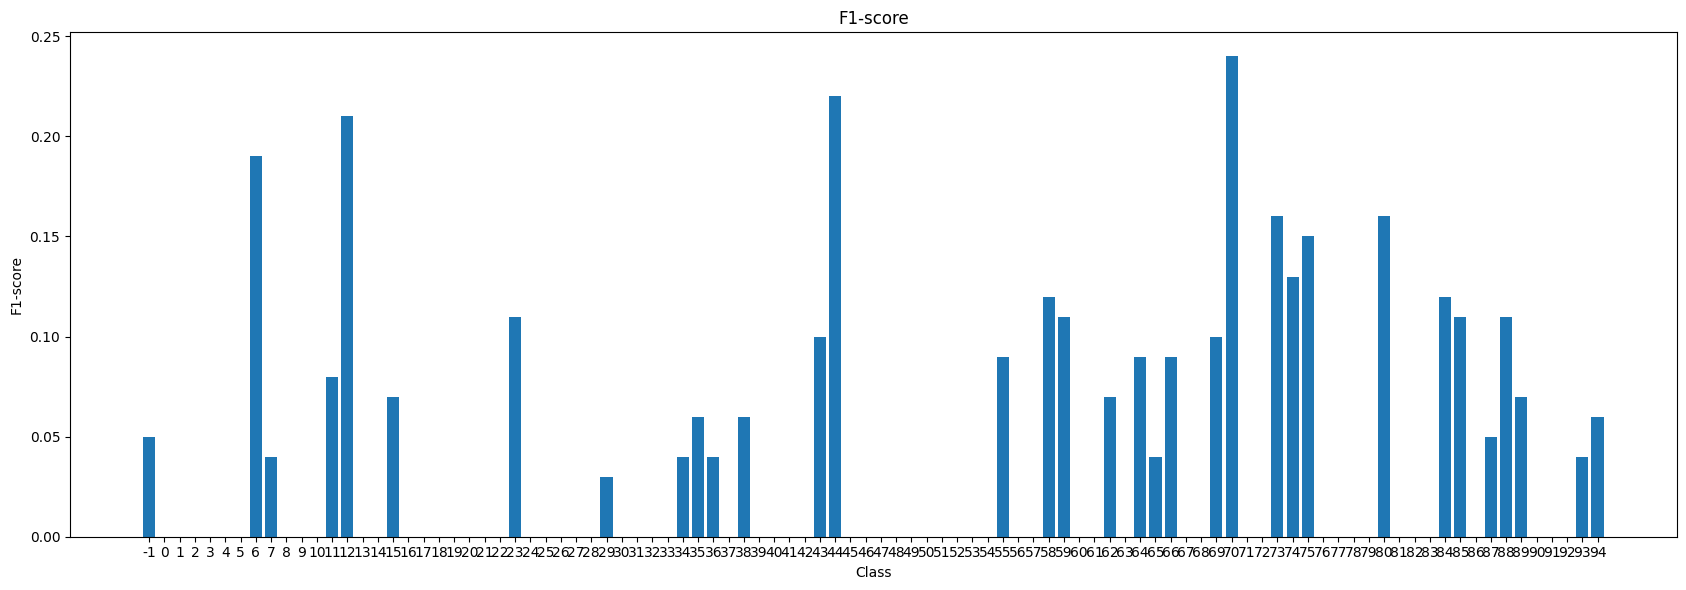

In [15]:
plt.figure(figsize=(50, 6))

# F1-score
plt.subplot(1, 3, 3)
plt.bar(df['Class'], df['F1-score'])
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()